In [1]:
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

## Data gathering and preprocessing

In [2]:
image_data = cv.imread(r'E:\AI\Projects\Face mask detection\Datasets\No_mask\00000.png')

In [3]:
image_data.shape   #(size=1024X1024 and channel = 3 = BGR(BLUE GREEN RED))

(1024, 1024, 3)

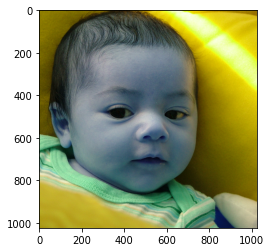

In [4]:
plt.imshow(image_data)  # not actual colour as by default it is BGR

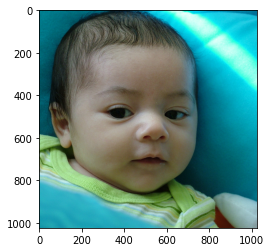

In [5]:
plt.imshow(cv.cvtColor(image_data , cv.COLOR_BGR2RGB)) #converting image colour from BGR to RGB

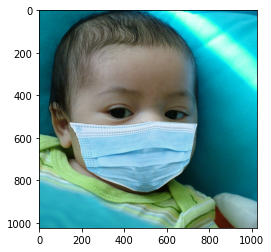

In [6]:
# now we have to do above thing for all the images for both mask and no mask dataset and for which we will use for loop

path = "E:\AI\Projects\Face mask detection\Datasets"
classes = ['Mask' , 'No_mask']

for category in classes:
    complete_path = os.path.join(path,category)
    for image in os.listdir(complete_path):
        image_data = cv.imread(os.path.join(complete_path , image))
        plt.imshow(cv.cvtColor(image_data , cv.COLOR_BGR2RGB))
        plt.show()
        break
    break

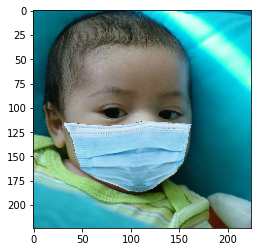

In [7]:
# now as we saw image size is 1024X1024 and to use ImageNet classifier size should be 224X224 so,

new_image = cv.resize(image_data , (224,224))
plt.imshow(cv.cvtColor(new_image , cv.COLOR_BGR2RGB))

In [8]:
new_image.shape      # we can see above that quality degraded

(224, 224, 3)

In [9]:
# creating a list of training dataset (mask + nomask)

train_data = list()

path = "E:\AI\Projects\Face mask detection\Datasets"
classes = ['No_mask' , 'Mask']

def creating_datset():
    for category in classes:
        
        complete_path = os.path.join(path,category)
        class_label = classes.index(category) # automatically assign 0 or 1 
        
        for image in os.listdir(complete_path):
            
            image_data = cv.imread(os.path.join(complete_path , image))
            new_image = cv.resize(image_data , (224,224))
            train_data.append([new_image , class_label])

In [10]:
creating_datset()

In [11]:
train_data[0]   # each image shape 224 rows and 224 columns with class labels as mentioned at last

[array([[[146, 131,   0],
         [143, 127,   0],
         [144, 129,   0],
         ...,
         [155, 119,   0],
         [155, 116,   0],
         [149, 117,   0]],
 
        [[149, 131,   0],
         [146, 129,   0],
         [145, 128,   0],
         ...,
         [149, 114,   0],
         [151, 113,   0],
         [150, 114,   0]],
 
        [[146, 129,   0],
         [148, 131,   0],
         [141, 127,   0],
         ...,
         [149, 109,   0],
         [150, 114,   0],
         [152, 112,   0]],
 
        ...,
 
        [[167, 152,  20],
         [171, 157,  24],
         [171, 154,  21],
         ...,
         [153, 154, 128],
         [160, 156, 132],
         [163, 155, 134]],
 
        [[166, 149,  19],
         [166, 150,  20],
         [166, 152,  20],
         ...,
         [159, 156, 133],
         [161, 156, 133],
         [161, 155, 132]],
 
        [[163, 146,  14],
         [166, 149,  15],
         [168, 149,  21],
         ...,
         [157, 156, 130],
  

In [12]:
len(train_data)

1950

In [13]:
# now we have to shuffle data to avoid overfitting

import random
random.shuffle(train_data)

In [14]:
# now we will make our x and y dataset

x = []
y = []

for features,labels in train_data:
    x.append(features)
    y.append(labels)
    

In [15]:
x = np.array(x).reshape(len(train_data) , 224 , 224 , 3)    

In [16]:
x.shape

(1950, 224, 224, 3)

In [17]:
y = np.array(y)

In [18]:
y.shape

(1950,)

In [19]:
# now we are normalizing it by dividing with 255 as pixel ranges between 0 to 255
x = x/255.0

In [20]:
x[0]

array([[[0.14117647, 0.26666667, 0.44313725],
        [0.14901961, 0.2745098 , 0.45490196],
        [0.1372549 , 0.26666667, 0.4627451 ],
        ...,
        [0.45490196, 0.6627451 , 0.76078431],
        [0.61568627, 0.79215686, 0.8745098 ],
        [0.75294118, 0.88235294, 0.94509804]],

       [[0.14117647, 0.2745098 , 0.44705882],
        [0.14509804, 0.2627451 , 0.44705882],
        [0.14117647, 0.26666667, 0.4627451 ],
        ...,
        [0.46666667, 0.67058824, 0.77647059],
        [0.63137255, 0.79215686, 0.89411765],
        [0.76470588, 0.88235294, 0.95686275]],

       [[0.14117647, 0.28627451, 0.45490196],
        [0.14509804, 0.2745098 , 0.44705882],
        [0.15294118, 0.2745098 , 0.46666667],
        ...,
        [0.47843137, 0.67843137, 0.77647059],
        [0.64313725, 0.8       , 0.89019608],
        [0.74509804, 0.87843137, 0.95294118]],

       ...,

       [[0.39215686, 0.49019608, 0.69803922],
        [0.3372549 , 0.43921569, 0.64313725],
        [0.36078431, 0

In [21]:
# Now as we made our datasets ,we will store that in a pickle file 

import pickle

pickle_out = open("x.pickle" , "wb")
pickle.dump(x , pickle_out)
pickle_out.close()

pickle_out = open("y.pickle" , "wb")
pickle.dump(y , pickle_out)
pickle_out.close()


In [22]:
pickle_in = open("x.pickle" , "rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle" , "rb")
y = pickle.load(pickle_in)

## Training model (Transfer Learning)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
# importing model to use it as a transfer learning

model = tf.keras.applications.mobilenet.MobileNet()

In [25]:
model.summary()  # state of art alogorithm (pre trained)

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [26]:
# now we have to remove last layers(last 3 layer) and attach our own output to it

base_input = model.layers[0].input

In [27]:
base_input

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [28]:
base_output = model.layers[-4].output  # removing last 3 layers and making our output as 4th layer from down 

In [29]:
base_output

<tf.Tensor 'dropout/cond/Identity:0' shape=(None, 1, 1, 1024) dtype=float32>

In [30]:
flat_layer = layers.Flatten()(base_output)

In [31]:
flat_layer

<tf.Tensor 'flatten/Reshape:0' shape=(None, 1024) dtype=float32>

In [32]:
final_output = layers.Dense(1)(flat_layer)  # 0 or 1
final_output = layers.Activation("sigmoid")(final_output)

In [33]:
final_output

<tf.Tensor 'activation/Sigmoid:0' shape=(None, 1) dtype=float32>

In [34]:
new_model = keras.Model(inputs = base_input , outputs = final_output)
new_model.summary() # our last 3 layers are added after dropout layer

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [35]:
# as our model is build ,now add compile parameters(optimisers and all)

new_model.compile(loss = 'binary_crossentropy' , optimizer = 'adam',  metrics = ['accuracy'])

In [36]:
x.shape

(1950, 224, 224, 3)

In [37]:
y.shape

(1950,)

In [38]:
# finally fitting/training model with our datasets

new_model.fit(x , y , epochs = 1 , validation_split = 0.1)

55/55 [==============================] - 527s 10s/step - loss: 0.0197 - accuracy: 0.9897 - val_loss: 9.9769e-07 - val_accuracy: 1.0000


In [39]:
new_model.save("face_mask_model.h5")

## lets test on query data.........

In [40]:
query1 = cv.imread(r'E:\AI\Projects\Face mask detection\Datasets\No_mask\00019.png')

NO MASK


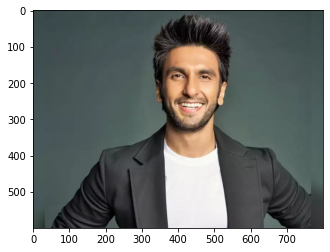

In [41]:
query1 = cv.imread(r'E:\AI\Projects\Face mask detection\Datasets\to test\65675521.cms')

plt.imshow(cv.cvtColor(query1 , cv.COLOR_BGR2RGB))

query1 = cv.resize(query1 , (224,224))

final_image = np.expand_dims(query1 , axis = 0)   # converting to 4th dimension as already did

final_image = final_image/255.0     # normalizing

prediction = new_model.predict(final_image)

if float(prediction) < 0.5:
    print("NO MASK")
else:
    print("MASK")

### Harr techinque

In [42]:
unknown_image = cv.imread(r"E:\AI\Projects\Face mask detection\Datasets\to test\61uyFic6sYL._SL1440_.jpg")

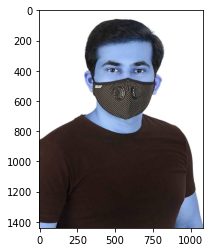

In [43]:
plt.imshow(unknown_image)

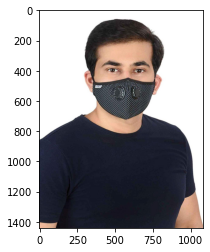

In [44]:
plt.imshow(cv.cvtColor(unknown_image , cv.COLOR_BGR2RGB))

In [45]:
grey_unknown_image = cv.cvtColor(unknown_image , cv.COLOR_BGR2GRAY)
grey_unknown_image.shape     # converted into gray so only 1 channel

(1440, 1080)

In [46]:
# Harr is a feature detector used in detecting particular face in multiple objects 

# to download "haarcascade_frontalface_default.xml".link:--https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [47]:
# lets see the face boundaries/corners of the face (not whole image)

faces = face_cascade.detectMultiScale(grey_unknown_image , 1.1 , 4)
faces

array([[304, 164, 531, 531]], dtype=int32)

In [48]:
# we will make a function to find 4 corners for a face 

for x,y,w,h in faces:
    
    roi_grey = grey_unknown_image[y:y+h , x:x+w]   # crop face from an image(gray)
    
    roi_color = unknown_image[y:y+h , x:x+w]       # crop face from an image(RGB)
    
    # cv.rectangle(image, (start_point), (end_point), color, thickness)
    cv.rectangle(unknown_image , (x,y) , (x+w , y+h) , (255,0,0) , 2) # rectangle alongside face
    
    facess = face_cascade.detectMultiScale(roi_grey)
    
    if len(facess) == 0:
        print("Face not detected")
    else:
        face_roi = roi_color[y:y+h , x:x+w]


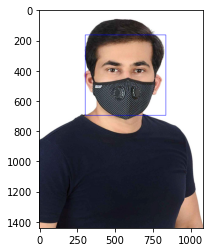

In [49]:
plt.imshow(cv.cvtColor(unknown_image , cv.COLOR_BGR2RGB))  #  rectangle corners for face

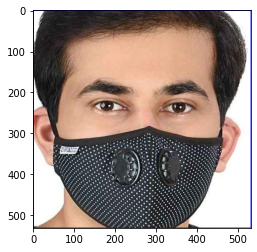

In [50]:
plt.imshow(cv.cvtColor(roi_color , cv.COLOR_BGR2RGB))        # cropped face in an image

# REAL TIME MASK DETECTION

In [57]:
# by combining our model and haar technique


path = 'haarcascade_frontalface_default.xml'       

rectangle_bgr = (255,255,255)  # setting rectangular background to white

img = np.zeros((255,255))      # making a black image

# width and height of the box
# cv.getTextSize = Calculates the width and height of a text string.
(text_width,text_height) = cv.getTextSize(text = 'some text inside the box' , fontFace = cv.FONT_HERSHEY_PLAIN , 
                                          fontScale = 1.5 , thickness = 1)[0] 

# setting text start position
text_offset_x = 0
text_offset_y = img.shape[0]-25                  # 255-25 = 230

# making the coordinates of box with a small padding of two pixels
box_coordinates = ((text_offset_x,text_offset_y) , (text_offset_x + text_width + 2 , text_offset_y - text_height - 2))
# ((0, 230), (327, 214))

# rectangular box
cv.rectangle(img , box_coordinates[0] , box_coordinates[1] , rectangle_bgr , cv.FILLED)

# cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
# org: It is the coordinates of the bottom-left corner of the text string in the image. 
#       The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).
cv.putText(img , text = 'some text inside the box' ,org = (text_offset_x,text_offset_y) , fontFace = cv.FONT_HERSHEY_PLAIN,
           fontScale = 1.5 , color = (0,0,0) , thickness = 1)


# to open webcam

cap = cv.VideoCapture(1)

if not cap.isOpened():
    cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("webcam not found")


while True:
    ret,frame = cap.read()
    #cv.imshow('input',frame)
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray_image = cv.cvtColor(frame , cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image , 1.1 , 4)
    for x,y,w,h in faces:
        roi_gray = gray_image[y:y+h , x:x+w]
        roi_color = frame[y:y+h , x:x+w]
        cv.rectangle(frame , (x,y) , (x+w , y+h) , (255,0,0) , 2)
        facess = face_cascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("face not found")
        else:
            for ex,ey,ew,eh in facess:
                face_roi = roi_color[ey:ey+eh , ex:ex+ew]
            
    final_image =  cv.resize(face_roi , (224,224))
 
    final_image = np.expand_dims(final_image , axis = 0)   # converting to 4th dimension as already did

    final_image = final_image/255.0     # normalizing

    prediction = new_model.predict(final_image) 
    
    if float(prediction) < 0.5:
        status = "No mask"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        cv.rectangle(frame , (x1,y1) , (x1+w1 , y1+h1) , (0,0,0) , -1)  # black background
        
        cv.putText(frame , status ,org = (x1 + int(w1/10) , y1 + int(h1/2)) , fontFace = cv.FONT_HERSHEY_SIMPLEX,
           fontScale = 0.7 , color = (0,0,255) , thickness = 2)
        
        cv.putText(frame , status ,org = (100,150) , fontFace = cv.FONT_HERSHEY_SIMPLEX,
           fontScale = 3 , color = (0,0,255) , thickness = 2 )
        
        cv.rectangle(frame , (x,y) , (x+w , y+h) , (0,0,255))  
        
    else:
        status = "Face mask"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        cv.rectangle(frame , (x1,y1) , (x1+w1 , y1+h1) , (0,0,0) , -1)  # black background
        
        cv.putText(frame , status ,org = (x1 + int(w1/10) , y1 + int(h1/2)) , fontFace = cv.FONT_HERSHEY_SIMPLEX,
           fontScale = 0.7 , color = (0,0,255) , thickness = 2)
        
        cv.putText(frame , status ,org = (100,150) , fontFace = cv.FONT_HERSHEY_SIMPLEX,
           fontScale = 3 , color = (0,255,0) , thickness = 2 )
        
        cv.rectangle(frame , (x,y) , (x+w , y+h) , (0,255,0))
        


face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found
face not found


KeyboardInterrupt: 